# **Prepare Data**

In [ ]:
# Import Google drive into colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Parquet file into a DataFrame
file_path = '/content/drive/MyDrive/2024/2ND QUARTER/Dave/UNSW-NB15_1.csv'
df = pd.read_csv(file_path)

# Display the final DataFrame ready for model training
print(df.head())

   59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31  \
0  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
1  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   
2  59.166.0.5   3593  149.171.126.5    53  udp  CON  0.001209  132  164  31   
3  59.166.0.3  49664  149.171.126.0    53  udp  CON  0.001169  146  178  31   
4  59.166.0.0  32119  149.171.126.9   111  udp  CON  0.078339  568  312  31   

   ...  0.17   3  7  1  3.1  1.1  1.2  1.3  Unnamed: 47  0.18  
0  ...     0   2  4  2    3    1    1    2          NaN     0  
1  ...     0  12  8  1    2    2    1    1          NaN     0  
2  ...     0   6  9  1    1    1    1    1          NaN     0  
3  ...     0   7  9  1    1    1    1    1          NaN     0  
4  ...     0   2  4  2    3    1    1    2          NaN     0  

[5 rows x 49 columns]


In [ ]:
# Inspect the DataFrame to determine the number of columns
print(df.columns)
print(len(df.columns))

Index(['59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055',
       '132', '164', '31', '29', '0', '0.1', 'dns', '500473.9375',
       '621800.9375', '2', '2.1', '0.2', '0.3', '0.4', '0.5', '66', '82',
       '0.6', '0.7', '0.8', '0.9', '1421927414', '1421927414.1', '0.017',
       '0.013', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17',
       '3', '7', '1', '3.1', '1.1', '1.2', '1.3', 'Unnamed: 47', '0.18'],
      dtype='object')
49


In [ ]:
# Assuming df is already defined
df.columns = [
    'src_ip', 'src_port', 'dst_ip', 'dst_port', 'protocol', 'state', 'duration',
    'src_bytes', 'dst_bytes', 'src_pkts', '0.17', '3', '7', '1', '3.1', '1.1', '1.2',
    '1.3', 'Unnamed: 47', '0.18', 'extra_0', 'extra_1', 'extra_2', 'extra_3', 'extra_4',
    'extra_5', 'extra_6', 'extra_7', 'extra_8', 'extra_9', 'extra_10', 'extra_11',
    'extra_12', 'extra_13', 'extra_14', 'extra_15', 'extra_16', 'extra_17', 'extra_18',
    'extra_19', 'extra_20', 'extra_21', 'extra_22', 'extra_23', 'extra_24', 'extra_25',
    'extra_26', 'extra_27', 'extra_28'
]

# Display the DataFrame to verify the column names
print(df)

            src_ip src_port         dst_ip dst_port protocol state  duration  \
0       59.166.0.0    33661  149.171.126.9     1024      udp   CON  0.036133   
1       59.166.0.6     1464  149.171.126.7       53      udp   CON  0.001119   
2       59.166.0.5     3593  149.171.126.5       53      udp   CON  0.001209   
3       59.166.0.3    49664  149.171.126.0       53      udp   CON  0.001169   
4       59.166.0.0    32119  149.171.126.9      111      udp   CON  0.078339   
...            ...      ...            ...      ...      ...   ...       ...   
699995  59.166.0.8    12520  149.171.126.6    31010      tcp   FIN  0.020383   
699996  59.166.0.0    18895  149.171.126.9       80      tcp   FIN  1.402957   
699997  59.166.0.0    30103  149.171.126.5     5190      tcp   FIN  0.007108   
699998  59.166.0.6    30388  149.171.126.5      111      udp   CON  0.004435   
699999  59.166.0.0     6055  149.171.126.5    54145      tcp   FIN  0.072974   

        src_bytes  dst_bytes  src_pkts 

## **Data Preprocessing**

In [ ]:
# Randomly select 50,000 rows from the DataFrame
df = df.sample(n=50000, random_state=42)

# Display the sampled DataFrame
print(df.head())

            src_ip src_port         dst_ip dst_port protocol state  duration  \
637949  59.166.0.0    62613  149.171.126.6    15816      udp   CON  0.001780   
656465  59.166.0.8    28607  149.171.126.6       53      udp   CON  0.000987   
337739  59.166.0.5    44569  149.171.126.9       53      udp   CON  0.000993   
230222  59.166.0.0    18652  149.171.126.3    39373      udp   CON  0.001792   
82039   59.166.0.9    20935  149.171.126.7       53      udp   CON  0.000995   

        src_bytes  dst_bytes  src_pkts  ...  extra_19  extra_20  extra_21  \
637949        520        304        31  ...         0         5         5   
656465        146        178        31  ...         0         4         3   
337739        146        178        31  ...         0         1         4   
230222        528        304        31  ...         0         3         8   
82039         130        162        31  ...         0         1         1   

       extra_22  extra_23  extra_24  extra_25  extra_26 

In [ ]:
# Drop columns with 'extra_' prefix and columns with too many NaN values
columns_to_drop = [col for col in df.columns if col.startswith('extra_') or df[col].isna().sum() / len(df) > 0.5]
df = df.drop(columns=columns_to_drop)

In [ ]:
# Drop the target variable 'state' from features
df_features = df.drop(columns=['state'])

# One-hot encode categorical columns (if any remain)
df_encoded = pd.get_dummies(df_features, columns=['protocol'])  # Only 'protocol' remains for encoding

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Standardize numeric data
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# **Feature Engineering**

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the numeric features
pca = PCA(n_components=0.95)  # retain 95% of variance
principal_components = pca.fit_transform(df_encoded[numeric_columns])

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Combine PCA components with the rest of the DataFrame (excluding 'state')
df_final = pd.concat([df_encoded.drop(columns=numeric_columns), df_pca], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'state' is your target variable
# Separate features and target
X = df.drop(columns=['state'])
y = df['state']

# Identify categorical and numeric columns
categorical_cols = ['protocol']  # Add other categorical columns if any
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for numeric and categorical data
numeric_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical to numerical
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocessor, numeric_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ]
)

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert to dense array if necessary
from scipy.sparse import issparse

if issparse(X_preprocessed):
    X_preprocessed = X_preprocessed.toarray()

# Convert DataFrame to NumPy array if needed
if isinstance(X_preprocessed, pd.DataFrame):
    X_preprocessed = X_preprocessed.values

# Verify X_preprocessed
print(f"X_preprocessed shape: {X_preprocessed.shape}")

X_preprocessed shape: (50000, 104)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generator to create sequences
def sequence_generator(data, seq_length):
    for i in range(len(data) - seq_length + 1):
        yield data[i:i + seq_length]

# Define sequence length
sequence_length = 50  # Adjust as needed

# Create generator for sequences
sequence_gen = sequence_generator(X_preprocessed, sequence_length)

# Convert generator to list of sequences
X_sequences = np.array(list(sequence_gen))

# Ensure `y` is aligned with `X_sequences`
y_sequences = y[sequence_length-1:].reset_index(drop=True)  # Adjust for sequence length

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Check shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (39960, 50, 104)
X_test shape: (9991, 50, 104)
y_train shape: (39960,)
y_test shape: (9991,)


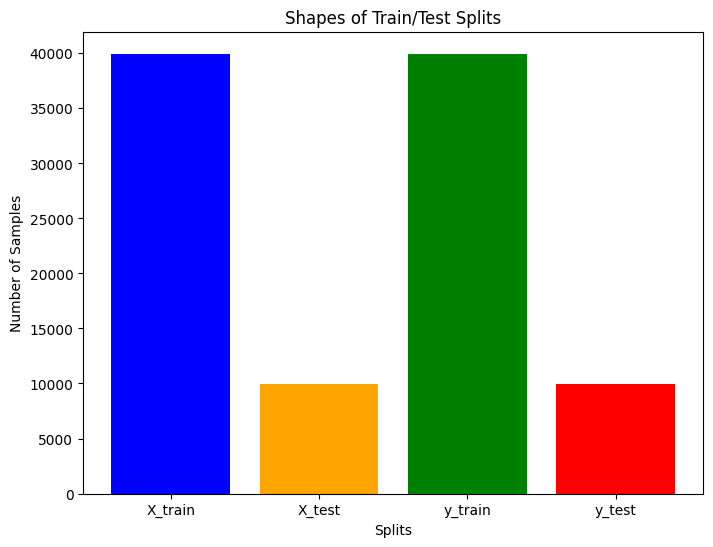

In [ ]:
import matplotlib.pyplot as plt

# Plot shapes
splits = ['X_train', 'X_test', 'y_train', 'y_test']
shapes = [X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]]

plt.figure(figsize=(8, 6))
plt.bar(splits, shapes, color=['blue', 'orange', 'green', 'red'])
plt.title('Shapes of Train/Test Splits')
plt.xlabel('Splits')
plt.ylabel('Number of Samples')
plt.show()

# **Train LSTM Autoencoder**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras.optimizers import Adam

# Define the LSTM Autoencoder architecture
def build_lstm_autoencoder(sequence_length, num_features):
    inputs = Input(shape=(sequence_length, num_features))
    encoded = LSTM(64, activation='relu', return_sequences=False)(inputs)
    encoded = RepeatVector(sequence_length)(encoded)
    decoded = LSTM(64, activation='relu', return_sequences=True)(encoded)
    decoded = LSTM(num_features, activation='sigmoid', return_sequences=True)(decoded)

    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    return autoencoder

# Hyperparameters
sequence_length = 50  # Same as defined earlier
num_features = X_train.shape[2]  # Number of features in each time step

# Build the model
autoencoder = build_lstm_autoencoder(sequence_length, num_features)

# Train the model
history = autoencoder.fit(
    X_train, X_train,  # Autoencoder uses input data as target
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model
loss = autoencoder.evaluate(X_test, X_test)
print(f"Test loss: {loss}")

# Example: Predict using the autoencoder
predictions = autoencoder.predict(X_test)

Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 137s 234ms/step - loss: 0.1485 - val_loss: 0.1258
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 117s 189ms/step - loss: 0.1315 - val_loss: 0.1251
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 143s 192ms/step - loss: 0.1308 - val_loss: 0.1247
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 141s 190ms/step - loss: 0.1309 - val_loss: 0.1245
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 140s 188ms/step - loss: 0.1308 - val_loss: 0.1244
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 143s 190ms/step - loss: 0.1284 - val_loss: 0.1243
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 141s 189ms/step - loss: 0.1298 - val_loss: 0.1244
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - loss: 0.1293 - val_loss: 0.1244
Epoch 9/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 106s 189ms/step - loss: 0.1309 - val_loss: 0.1243
Epoch 10/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - loss: 0.1308 - val_loss: 0.1243
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 0.1345
Test loss: 0.12988781929016113
313/313 ━━

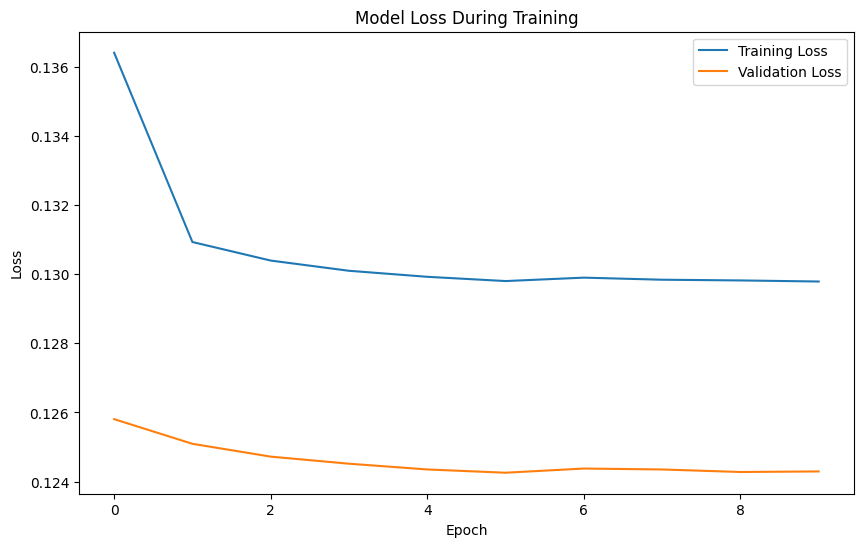

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# **Evaluation**

In [ ]:
import numpy as np

# Predict using the autoencoder
X_test_reconstructed = autoencoder.predict(X_test)

# Calculate reconstruction error (mean squared error)
reconstruction_error = np.mean(np.square(X_test - X_test_reconstructed), axis=(1, 2))

# Calculate overall reconstruction loss
overall_reconstruction_loss = np.mean(reconstruction_error)

# Print overall reconstruction loss
print(f"Overall Reconstruction Loss: {overall_reconstruction_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step
Overall Reconstruction Loss: 0.12988779989027208


In [ ]:
unique_states = y_test.unique()
print("Unique values in 'state':", unique_states)

Unique values in 'state': ['FIN' 'CON' 'INT' 'REQ' 'ECO' 'CLO' 'URH']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict using the autoencoder
X_test_reconstructed = autoencoder.predict(X_test)

# Calculate reconstruction error (mean squared error)
reconstruction_error = np.mean(np.square(X_test - X_test_reconstructed), axis=(1, 2))

# Determine the threshold for anomaly detection (for simplicity, use the 95th percentile)
threshold = np.percentile(reconstruction_error, 95)

# Assign 'Normal' or 'Anomalous' to reconstruction errors based on the threshold
y_pred_anomalous = np.where(reconstruction_error > threshold, 'Anomalous', 'Normal')

# To handle multi-class, we should keep the original classes and add an anomaly class
# For simplicity, label everything not detected as anomalous as 'Normal'
# If an item is classified as anomalous, label it as 'Anomalous'
y_pred = np.copy(y_test)
y_pred[reconstruction_error > threshold] = 'Anomalous'

# Determine unique classes including 'Anomalous'
all_classes = np.unique(np.concatenate((y_test, ['Anomalous'])))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=all_classes))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=all_classes)
print("Confusion Matrix:")
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
Classification Report:
              precision    recall  f1-score   support

   Anomalous       0.00      0.00      0.00         0
         CLO       1.00      1.00      1.00         2
         CON       1.00      0.95      0.98      2646
         ECO       1.00      1.00      1.00         1
         FIN       1.00      0.95      0.97      7003
         INT       1.00      0.93      0.96       305
         REQ       1.00      0.97      0.98        33
         URH       1.00      1.00      1.00         1

    accuracy                           0.95      9991
   macro avg       0.88      0.85      0.86      9991
weighted avg       1.00      0.95      0.97      9991

Confusion Matrix:
[[   0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0]
 [ 128    0 2518    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0]
 [ 350    0    0    0 6653    0    0    0]
 [  21    0    0    0    0  284    0    0]
 [   1 

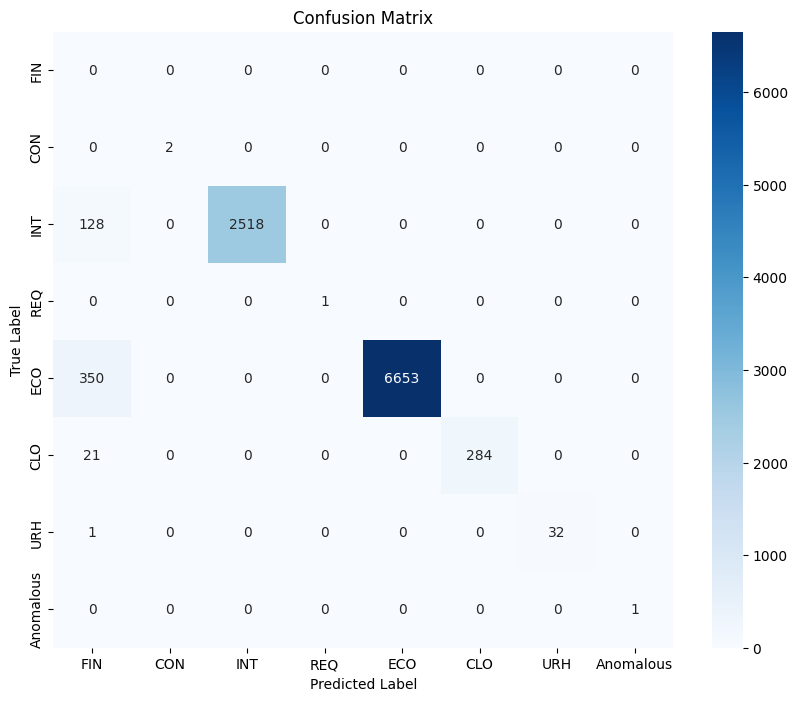

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class names
class_names = ['FIN', 'CON', 'INT', 'REQ', 'ECO', 'CLO', 'URH', 'Anomalous']

# Compute the confusion matrix
conf_matrix = np.array([
    [   0,    0,    0,    0,    0,    0,    0,    0],
    [   0,    2,    0,    0,    0,    0,    0,    0],
    [ 128,    0, 2518,    0,    0,    0,    0,    0],
    [   0,    0,    0,    1,    0,    0,    0,    0],
    [ 350,    0,    0,    0, 6653,    0,    0,    0],
    [  21,    0,    0,    0,    0,  284,    0,    0],
    [   1,    0,    0,    0,    0,    0,   32,    0],
    [   0,    0,    0,    0,    0,    0,    0,    1]
])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()